In [1]:
from __future__ import print_function
import struct
import numpy as np
import math
import os
import sys
# import ROOT
import array
# %matplotlib notebook
import matplotlib.pyplot as plt
import re
import pandas as pd
import copy
import glob
from parse import parse

import matplotlib.pylab as pltt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse,Arrow
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import matplotlib
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
import matplotlib.font_manager as font_manager

import resource
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))


In [2]:
elements={"h": 1, "he": 2, "li": 3, "be": 4, "b": 5, "c": 6, "n": 7, "o": 8, "f": 9, "ne": 10, "na": 11, "mg": 12, "al": 13, 
"si": 14, "p": 15, "s": 16, "cl": 17, "ar": 18, "k": 19, "ca": 20, "sc": 21, "ti": 22, "v": 23, "cr": 24, "mn": 25, "fe": 26,
 "co": 27, "ni": 28, "cu": 29, "zn": 30, "ga": 31, "ge": 32, "as": 33, "se": 34, "br": 35, "kr": 36, "rb": 37, "sr": 38, "y": 39,
  "zr": 40, "nb": 41, "mo": 42, "tc": 43, "ru": 44, "rh": 45, "pd": 46, "ag": 47, "cd": 48, "in": 49, "sn": 50, "sb": 51, "te": 52,
   "i": 53, "xe": 54, "cs": 55, "ba": 56, "la": 57, "ce": 58, "pr": 59, "nd": 60, "pm": 61, "sm": 62, "eu": 63, "gd": 64, "tb": 65,
    "dy": 66, "ho": 67, "er": 68, "tm": 69, "yb": 70, "lu": 71, "hf": 72, "ta": 73, "w": 74, "re": 75, "os": 76, "ir": 77, "pt": 78,
     "au": 79, "hg": 80, "tl": 81, "pb": 82, "bi": 83, "po": 84, "at": 85, "rn": 86, "fr": 87, "ra": 88, "ac": 89, "th": 90, "pa": 91,
      "u": 92, "np": 93, "pu": 94, "am": 95, "cm": 96, "bk": 97, "cf": 98, "es": 99, "fm": 100, "md": 101, "no": 102, "lr": 103, "rf": 104,
       "db": 105, "sg": 106, "bh": 107, "hs": 108, "mt": 109, "ds": 110, "rg": 111, "cn": 112, "nh": 113, "fl": 114, "mc": 115, "lv": 116, "ts": 117, "og": 118,
       "119": 119,"120": 120,"121": 121,"122": 122,"123": 123,"124": 124,"125": 125,"126": 126,"127": 127,"128": 128,"129": 129,"130": 130,
       "131": 131,"132": 132,"133": 133,"134": 134,"135": 135,"136": 136}

Zele = []
Zele.append("n")
for key in elements:
    Zele.append(key)

def getnamebyz(z):
    """
    Get element name by atomic number Z
    
    Parameters:
       z ( int ): Atomic number Z
    """
    return Zele[z]

def getZ(input):
    """
    Get atomic number Z by element name
    
    Parameters:
       input ( str ): Element name
    """
    if (input==""):
        return -8888
    else:
        sep=re.split('(\d+)',input)
        if len(sep)==1:
            if sep[0]=="n":
                return int(0)
            elif (sep[0]=="p" or sep[0]=="d" or sep[0]=="t"):
                return int(1)            
            else:
                print("Something wrong! ",input)
        else:
            return int(elements[sep[0]])

def getA(input):
    """
    Get mass number A by element name
    
    Parameters:
       input ( str ): Element name
    """
    if (input==""):
        return -9999
    else:
        sep=re.split('(\d+)',input)
        if len(sep)==1:
            if sep[0]=="n":
                return 1
            elif sep[0]=="p":
                return 1
            elif sep[0]=="d":
                return 2
            elif sep[0]=="t":
                return 3
            else:
                print("Something wrong! ",input)
        else:
            return int(sep[1])

def drawbox(N,Z,fcolor='None',ecolor='gray', falpha = 1,zorder=-1):
    if (zorder>0):
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha,zorder=zorder)
    else:
        rec = plt.Rectangle((N-0.5,Z-0.5),1,1,facecolor=fcolor,edgecolor=ecolor,alpha = falpha)
    #plt.text(N-0.4,Z-0.1,'$\mathregular{^{'+str(Z+N)+'}'+elements[Z]+'}$')
    return rec 


def drawarea(Aele,fcolor='None',iswithtext=True):
    recs = []
    for i in Aele:
        for j in range(i[1]-elements[i[0].lower()],i[2]-elements[i[0].lower()]+1):
            recs.append(drawbox(j,elements[i[0].lower()],fcolor))
    return recs


Zlim = [9.5,116]
Nlim = [9.5,200]
NZstep = [2,2]
def plot_base(axis,eletag=False):
    magic_num = [2, 8, 20, 28, 50, 82, 126]
    for i in magic_num:
        axis.axhline(y=i+0.5,color='b',linestyle='--',linewidth=0.2)
        axis.axhline(y=i-0.5,color='b',linestyle='--',linewidth=0.2)
        axis.axvline(x=i+0.5,color='b',linestyle='--',linewidth=0.2)
        axis.axvline(x=i-0.5,color='b',linestyle='--',linewidth=0.2)

    nubase_stable = np.load("heavy/nubase/nubase_stable.npy",allow_pickle='TRUE')
    for i in range(len(nubase_stable)):
        axis.add_patch(drawbox(nubase_stable[i]["N"],nubase_stable[i]["Z"],fcolor='k',ecolor='None',falpha = 1))
    axis.set_xlabel('Neutron number, $N$')
    axis.set_ylabel('Proton number, $Z$')
    axis.set_xlim(Nlim)
    axis.set_ylim(Zlim)
    if(eletag):    
        for i in range(int(Zlim[0]+0.5),int(Zlim[1]+0.5)):
            text = axis.text(Nlim[1]-1.5, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='bold',fontsize='medium',family = ['Times New Roman'])
    axis.set_xticks(np.arange(Nlim[0]+0.5,Nlim[1]-0.5,NZstep[0]))
    axis.set_xticklabels([('%.0f'%i) for i in np.arange(Nlim[0]+0.5,Nlim[1]-0.5,NZstep[0])])
    axis.set_yticks(np.arange(Zlim[0]+0.5,Zlim[1]-0.5,NZstep[1]))
    axis.set_yticklabels([('%.0f'%i) for i in np.arange(Zlim[0]+0.5,Zlim[1]-0.5,NZstep[1])])    
def plot_magic(axis,color='y',linewidth=1):
    magic_num = [2, 8, 20, 28, 50, 82, 126]
    for i in magic_num:
        axis.axhline(y=i+0.5,color=color,linestyle='--',linewidth=linewidth)
        axis.axhline(y=i-0.5,color=color,linestyle='--',linewidth=linewidth)
        axis.axvline(x=i+0.5,color=color,linestyle='--',linewidth=linewidth)
        axis.axvline(x=i-0.5,color=color,linestyle='--',linewidth=linewidth)
#     axis.text(riname, i, getnamebyz(i).capitalize(),ha="center", va="center", color="k",fontweight='normal',fontsize='medium',family = ['Times New Roman'])

In [3]:
def getcmap(bounds,colormap="Spectral"):
    cmap = matplotlib.cm.get_cmap(colormap)
    # Get the colormap colors
    my_cmap = cmap(np.arange(cmap.N))
    # Set alpha
    my_cmap[:,-1] = np.full(cmap.N,1.)
    # Create new colormap
    cmap = matplotlib.colors.ListedColormap(my_cmap)

    cmaplist = [cmap(i) for i in range(cmap.N)]
    # cmaplist[0] = (1., 1., 1., 1.0)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    return cmap,sm,norm

In [4]:
ame = np.load("heavy/ame/all_ame20.npy",allow_pickle='TRUE')

{'N-Z': 1, 'N': 1, 'Z': 0, 'A': 1, 'EL': 'n', 'O': 'na', 'M': 8071.31806, 'DM': 0.00044, 'is_ex_M': 1, 'B': 0.0, 'DB': 0.0, 'is_ex_B': 1, 'Decay': 'B-', 'Qb': 782.347, 'DQb': 0.0004, 'is_ex_Qb': 1, 'A2': 1, 'AM': 8664.9159, 'DAM': 0.00047, 'is_ex_AM': 1, 'ZA': 1, 'Sn': 0.0, 'D_Sn': 0.0, 'is_ex_Sn': 1, 'Sp': 999999.0, 'D_Sp': 999999.0, 'is_ex_Sp': 1, 'Q4b': 999999.0, 'D_Q4b': 999999.0, 'is_ex_Q4b': 1, 'Qda': 999999.0, 'D_Qda': 999999.0, 'is_ex_Qda': 1, 'Qpa': 999999.0, 'Qna': 999999.0, 'D_Qna': 999999.0, 'is_ex_Qna': 1, 'S2n': 999999.0, 'D_S2n': 999999.0, 'is_ex_S2n': 1, 'S2p': 999999.0, 'D_S2p': 999999.0, 'is_ex_S2p': 1, 'Qa': 999999.0, 'D_Qa': 999999.0, 'is_ex_Qa': 1, 'Q2b': 999999.0, 'D_Q2b': 999999.0, 'is_ex_Q2b': 1, 'Qep': 999999.0, 'D_Qep': 999999.0, 'is_ex_Qep': 1, 'Qbn': 999999.0, 'D_Qbn': 999999.0, 'is_ex_Qbn': 1}


In [180]:
print(ame[100])

{'N-Z': 10, 'N': 15, 'Z': 5, 'A': 20, 'EL': 'B', 'O': '-n', 'M': 69401.569, 'DM': 546.357, 'is_ex_M': 1, 'B': 4405.6529, 'DB': 27.3178, 'is_ex_B': 1, 'Decay': 'B-', 'Qb': 31898.0019, 'DQb': 593.0377, 'is_ex_Qb': 1, 'A2': 20, 'AM': 74505.644, 'DAM': 586.538, 'is_ex_AM': 1, 'ZA': 5020, 'Sn': -1560.0, 'D_Sn': 150.0, 'is_ex_Sn': 1, 'Sp': 999999.0, 'D_Sp': 999999.0, 'is_ex_Sp': 1, 'Q4b': 69419.0319, 'D_Q4b': 546.357, 'is_ex_Q4b': 1, 'Qda': 999999.0, 'D_Qda': 999999.0, 'is_ex_Qda': 1, 'Qpa': 999999.0, 'Qna': 999999.0, 'D_Qna': 999999.0, 'is_ex_Qna': 1, 'S2n': -1466.2927, 'D_S2n': 583.2574, 'is_ex_S2n': 1, 'S2p': 999999.0, 'D_S2p': 999999.0, 'is_ex_S2p': 1, 'Qa': 999999.0, 'D_Qa': 999999.0, 'is_ex_Qa': 1, 'Q2b': 47635.0708, 'D_Q2b': 552.0237, 'is_ex_Q2b': 1, 'Qep': 999999.0, 'D_Qep': 999999.0, 'is_ex_Qep': 1, 'Qbn': 28916.4961, 'D_Qbn': 555.1454, 'is_ex_Qbn': 1}


In [19]:
dz10 = np.load("heavy/models/data_dz10.npy",allow_pickle='TRUE')
print(dz10[0])

{'ZA': 20029, 'N': 9, 'Z': 20, 'A': 29, 'EL': 'ca', 'Ebind': 122.253, 'mass': 96.16828381999998, 'S1n': 0.0, 'S2n': 0.0, 'S1p': 0.0, 'S2p': -14.411, 'Qb': -999999, 'Qbn': -999999, 'isbound': False}


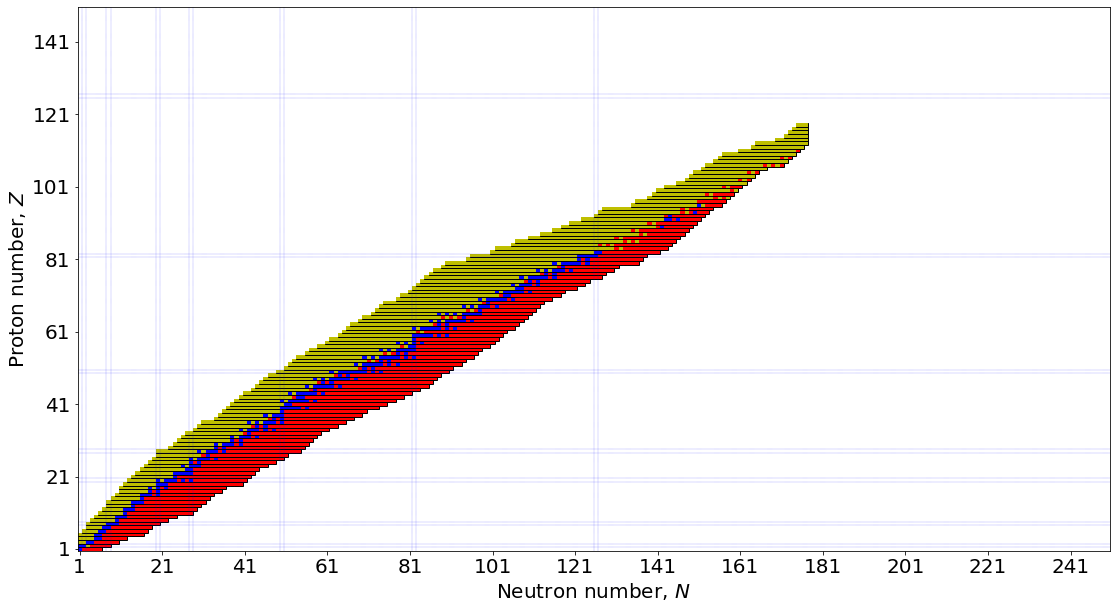

In [20]:
## Plotting freezeout abundance
Zlim = [0.5,150.5]
Nlim = [0.5,250.5]
astep = 20

fig,axis = plt.subplots()
fig.set_size_inches(18.5,10)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,False);
axis.set_xticks(np.arange(Nlim[0]+0.5,Nlim[1]-0.5,astep));
axis.set_xticklabels([('%.0f'%i) for i in np.arange(Nlim[0]+0.5,Nlim[1]-0.5,astep)]);
axis.set_yticks(np.arange(Zlim[0]+0.5,Zlim[1]-0.5,astep));
axis.set_yticklabels([('%.0f'%i) for i in np.arange(Zlim[0]+0.5,Zlim[1]-0.5,astep)]);
nubase_stable = np.load("heavy/nubase/nubase_stable.npy",allow_pickle='TRUE')

# line = "Nuc,A,Z,N,mass,dmass,mass excess, dmass excess\n"
for i in ame:
    filter_stable = list(filter(lambda cond: (cond["N"] == i["N"] and cond["Z"]==i["Z"]),nubase_stable))
    plt.gca().add_patch(drawbox(i["N"],i["Z"],fcolor='None',ecolor='k',falpha = 1))
    if (len(filter_stable)>=1):
        plt.gca().add_patch(drawbox(i["N"],i["Z"],fcolor='b',ecolor='None',falpha = 1))
    else:
        if (i["Qb"]>0 and i["Qb"]<999999):
            plt.gca().add_patch(drawbox(i["N"],i["Z"],fcolor='r',ecolor='None',falpha = 1))
        else:
            plt.gca().add_patch(drawbox(i["N"],i["Z"],fcolor='y',ecolor='None',falpha = 1))
    mass_amu = i["A2"]+i["AM"]*1e-6
    dmass_amu = i["DAM"]*1e-6
    mass_excess = i["M"]
    dmass_excess = i["DM"]

In [21]:
## Gettting all molecules for Z<110
import nistchempy as nist

In [23]:
df = nist.get_all_data()

In [106]:
df.to_pickle("nist_compound_data.pkl")

In [107]:
import re

In [314]:
list_associated_elements = ["H","C","N","O","F","P","S","Cl"]
list_associated_elements_keys = {"H":0,"C":1,"N":2,"O":3,"F":4,"P":5,"S":6,"Cl":7}


filtered_df1 = df.loc[~df['formula'].str.contains(' |\+|\-|·')]
# filtered_df2 = filtered_df1.loc[filtered_df1['formula'].str.contains('As')]
# filtered_df3 = filtered_df2.loc[filtered_df2['formula'].str.contains('O|C|F|H')]
cnt = 0
molecules = []
for ind in filtered_df1.index:
    txt = filtered_df1['formula'][ind]
#     res = [idx for idx in range(len(txt)) if txt[idx].isupper()]
    txtout = ""
    for idx in range(len(txt)):
        if txt[idx].isupper():
            txtout+="-"
        txtout+=txt[idx]
    txtout_arr = txtout.split("-")
    txtout_arr = txtout_arr[1:]
    txtout_arr2 = []
    for i in txtout_arr:
        itemstxtout = re.split('(\d+)',i)
        if (len(itemstxtout)>1):
            itemstxtout = itemstxtout[:-1]
            txtout_arr2.append(itemstxtout)
        else:
            itemstxtout.append('1')
            txtout_arr2.append(itemstxtout)
#     print(txt,txtout_arr2)
    #reject molecular with only one element
    if (len(txtout_arr2)==1):
        continue
        print(txt,txtout_arr2)
    #reject different names in periodic table (mostly p, d, t
    is_iso = False
    for i in txtout_arr2:
        if (not (i[0].lower() in elements)):
            is_iso = True
    if (is_iso):
        continue
#     print(txtout_arr2)
    molecule = []
    elelist = []
#     flag_include_associated_elements = False
    association_pattern = 0x0
    for i in txtout_arr2:
        molecule.append({"ele":i[0],"Z":elements[i[0].lower()],"num":int(i[1])})
        elelist.append(i[0])
        if (i[0] in list_associated_elements):
            association_pattern = association_pattern|(1<<list_associated_elements_keys[i[0]])

    if (association_pattern==0):
        continue
    molecules.append({"formula":txt,"items":molecule,"elelist":elelist,
                      "association_pattern":association_pattern,"keys":list_associated_elements_keys})
#     if (cnt>100):
#         break
    cnt+=1

1461
{'formula': 'AgH3', 'items': [{'ele': 'Ag', 'Z': 47, 'num': 1}, {'ele': 'H', 'Z': 1, 'num': 3}], 'elelist': ['Ag', 'H'], 'association_pattern': 1, 'keys': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7}}
{'formula': 'AgNO', 'items': [{'ele': 'Ag', 'Z': 47, 'num': 1}, {'ele': 'N', 'Z': 7, 'num': 1}, {'ele': 'O', 'Z': 8, 'num': 1}], 'elelist': ['Ag', 'N', 'O'], 'association_pattern': 12, 'keys': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7}}
{'formula': 'AlBrClH', 'items': [{'ele': 'Al', 'Z': 13, 'num': 1}, {'ele': 'Br', 'Z': 35, 'num': 1}, {'ele': 'Cl', 'Z': 17, 'num': 1}, {'ele': 'H', 'Z': 1, 'num': 1}], 'elelist': ['Al', 'Br', 'Cl', 'H'], 'association_pattern': 129, 'keys': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7}}
{'formula': 'AlBrCl2', 'items': [{'ele': 'Al', 'Z': 13, 'num': 1}, {'ele': 'Br', 'Z': 35, 'num': 1}, {'ele': 'Cl', 'Z': 17, 'num': 2}], 'elelist': ['Al', 'Br', 'Cl'], 'association_pattern': 128, 'keys': {'H

In [316]:
from pyteomics import mass

In [317]:
print(mass.nist_mass['C'])

{0: (12.0, 1.0), 8: (8.037675, 0.0), 9: (9.0310367, 0.0), 10: (10.0168532, 0.0), 11: (11.0114336, 0.0), 12: (12.0, 0.9893), 13: (13.0033548378, 0.0107), 14: (14.003241989, 0.0), 15: (15.0105993, 0.0), 16: (16.014701, 0.0), 17: (17.022586, 0.0), 18: (18.02676, 0.0), 19: (19.03481, 0.0), 20: (20.04032, 0.0), 21: (21.04934, 0.0), 22: (22.0572, 0.0)}


In [318]:
associated_elements = {}
for i in list_associated_elements:
    list_stable_iso = [] 
    isodata = mass.nist_mass[i]
    elementdata = []
    for A in isodata:
        if isodata[A][1]>0.01 and A>0:
            elementdata.append({"Iso":"<sup>"+str(A)+"</sup>"+i,"Z":elements[i.lower()],"A":A,"abundance":isodata[A][1],"amass":isodata[A][0],
                               "num":0})
    associated_elements[i] = elementdata
print(associated_elements)
import copy
associated_elements_c = copy.deepcopy(associated_elements)
# associated_elements['H'][0]['abundance'] = 1
print(associated_elements_c)

{'H': [{'Iso': '<sup>1</sup>H', 'Z': 1, 'A': 1, 'abundance': 0.999885, 'amass': 1.00782503207, 'num': 0}], 'C': [{'Iso': '<sup>12</sup>C', 'Z': 6, 'A': 12, 'abundance': 0.9893, 'amass': 12.0, 'num': 0}, {'Iso': '<sup>13</sup>C', 'Z': 6, 'A': 13, 'abundance': 0.0107, 'amass': 13.0033548378, 'num': 0}], 'N': [{'Iso': '<sup>14</sup>N', 'Z': 7, 'A': 14, 'abundance': 0.99636, 'amass': 14.0030740048, 'num': 0}], 'O': [{'Iso': '<sup>16</sup>O', 'Z': 8, 'A': 16, 'abundance': 0.99757, 'amass': 15.99491461956, 'num': 0}], 'F': [{'Iso': '<sup>19</sup>F', 'Z': 9, 'A': 19, 'abundance': 1.0, 'amass': 18.99840322, 'num': 0}], 'P': [{'Iso': '<sup>31</sup>P', 'Z': 15, 'A': 31, 'abundance': 1.0, 'amass': 30.97376163, 'num': 0}], 'S': [{'Iso': '<sup>32</sup>S', 'Z': 16, 'A': 32, 'abundance': 0.9499, 'amass': 31.972071, 'num': 0}, {'Iso': '<sup>34</sup>S', 'Z': 16, 'A': 34, 'abundance': 0.0425, 'amass': 33.9678669, 'num': 0}], 'Cl': [{'Iso': '<sup>35</sup>Cl', 'Z': 17, 'A': 35, 'abundance': 0.7576, 'amass

In [332]:
## Adding molecules list

def productGen(arr, cur=[]):
    if len(arr) < 1: 
        yield cur
    else:
        for item in arr[0]:
            yield from productGen(arr[1:], [*cur, item])
# i = 0
# associated_elements_sort = []
# for i in associated_elements:
#     associated_elements_sort.append(associated_elements[i])
# for combo in productGen(associated_elements_sort):
#     print(combo)
#     cnt+=1
#     if (cnt>1):
#         break
        
# molecules.append({"formula":txt,"items":molecule,"elelist":elelist,
#                   "association_pattern":association_pattern,"keys":list_associated_elements_keys})
#molecule.append({"ele":i[0],"Z":elements[i[0].lower()],"num":int(i[1])})
molecules_more = []
cnt = 0
for i in molecules:
    associated_elements_c = copy.deepcopy(associated_elements)
    #mass added
    for j in i["items"]:
        if (j["ele"] in list_associated_elements):##only combination in the list
            for kdx,k in enumerate(associated_elements_c[j["ele"]]):#loop through all isotopes in associated_elements_c
                associated_elements_c[j["ele"]][kdx]["num"] = j["num"]
    associated_elements_here = []
    for j in i["items"]:
        if (j["ele"] in list_associated_elements):
            associated_elements_here.append(associated_elements_c[j["ele"]])
    
    for combo in productGen(associated_elements_here):#each combination
        formulaAdd = ""
        amass_add = 0.
        abund_prod = 1.
        for k in combo:
            formulaAdd += k["Iso"]+(("<sub>"+str(k["num"])+"</sub>") if k["num"]>1 else "")
            amass_add+=k["amass"]*float(k["num"])
            abund_prod*=k["abundance"]
#         print(formulaAdd,abund_prod)
        molecules_more.append({"formula":i["formula"],"items":i["items"],"elelist":i["elelist"],
                               "association_pattern":i["association_pattern"],"keys":i["keys"],
                               "formulaAdd":formulaAdd,"amass_add":amass_add,"abund_prod":abund_prod})          
#     if (cnt>2):
#         break
    cnt+=1

print(molecules_more[:2])
print(len(molecules),len(molecules_more))

[{'formula': 'AgH3', 'items': [{'ele': 'Ag', 'Z': 47, 'num': 1}, {'ele': 'H', 'Z': 1, 'num': 3}], 'elelist': ['Ag', 'H'], 'association_pattern': 1, 'keys': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7}, 'formulaAdd': '<sup>1</sup>H<sub>3</sub>', 'amass_add': 3.02347509621, 'abund_prod': 0.999885}, {'formula': 'AgNO', 'items': [{'ele': 'Ag', 'Z': 47, 'num': 1}, {'ele': 'N', 'Z': 7, 'num': 1}, {'ele': 'O', 'Z': 8, 'num': 1}], 'elelist': ['Ag', 'N', 'O'], 'association_pattern': 12, 'keys': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7}, 'formulaAdd': '<sup>14</sup>N<sup>16</sup>O', 'amass_add': 29.997988624359998, 'abund_prod': 0.9939388452}]
1461 2392


In [340]:
all_mass_database = []
#AME
# list_associated_elements = ["H","C","N","O","F","P","S","Cl"]
# list_associated_elements_key = {"H":0,"C":1,"N":2,"O":3,"F":4,"P":5,"S":6,"Cl":7}

cnt = 0
cnt2 = 0
for i in ame:
    filter_stable = list(filter(lambda cond: (cond["N"] == i["N"] and cond["Z"]==i["Z"]),nubase_stable))
    flag_betadecay = -9999
    if (len(filter_stable)>=1):
        flag_betadecay = 0
    else:
        if (i["Qb"]>0 and i["Qb"]<999999):
            flag_betadecay = -1
        else:
            flag_betadecay = 1
    amass_amu = i["A2"]+i["AM"]*1e-6
    damass_amu = i["DAM"]*1e-6
    mass_excess = i["M"]
    dmass_excess = i["DM"]
    ## exception
    if (i["EL"] in list_associated_elements):
        continue
    if (i["Z"]<=1):
        continue
    #Single isotope
    association_pattern = 0x0
    all_mass_database.append({"tag":("ame20exp" if i["is_ex_M"]==1 else "ame20extr"),"formula":i["EL"],"iso":"<sup>"+str(i["N"]+i["Z"])+"</sup>"+i["EL"],
                              "amass_amu":amass_amu,"damass_amu":damass_amu,
                              "pattern":association_pattern,"abundance":1.,
                              "primZ":i["Z"],"primN":i["N"],"primA":i["N"]+i["Z"],
                              "primIso":str(i["N"]+i["Z"])+i["EL"],"flag_betadecay": flag_betadecay})
    cnt2+=1
    associated_molecules = []
    for j in molecules_more:
        if (not (i["EL"] in j["elelist"])):
            continue
        #loop through items
        formula = j["formula"]
        items = j["items"]
        flag_exclude = False
        for kdx,k in enumerate(items):
            if (not (k["ele"] in list_associated_elements) and i["EL"]!=k["ele"]):
                flag_exclude = True
        if (flag_exclude):
            continue
        cnt+=1
        
        elelist = j["elelist"]
        association_pattern = j["association_pattern"]
        formulaAdd = j["formulaAdd"]
        amass_add = j["amass_add"]
        abund_prod = j["abund_prod"]
        numPrim = 1
        for kdx,k in enumerate(items):
            if (i["EL"]==k["ele"]):
                numPrim = k["num"]
        
        all_mass_database.append({"tag":("ame20exp" if i["is_ex_M"]==1 else "ame20extr"),"formula":formula,"iso":"<sup>"+str(i["N"]+i["Z"])+"</sup>"+i["EL"]+(("<sub>"+str(numPrim)+"</sub>") if numPrim>1 else "")+formulaAdd,
                          "amass_amu":amass_amu+amass_add,"damass_amu":damass_amu,
                          "pattern":association_pattern,"abundance":abund_prod,
                          "primZ":i["Z"],"primN":i["N"],"primA":i["N"]+i["Z"],
                                  "primIso":str(i["N"]+i["Z"])+i["EL"],"flag_betadecay": flag_betadecay})

print(cnt,cnt2,len(all_mass_database))

54003 3408 57411


In [344]:
for i in all_mass_database[10:50]:
    print(i)   

{'tag': 'ame20extr', 'formula': 'ClLiO', 'iso': '<sup>3</sup>Li<sup>35</sup>Cl<sup>16</sup>O', 'amass_amu': 53.994542299559996, 'damass_amu': 0.002147, 'pattern': 136, 'abundance': 0.755759032, 'primZ': 3, 'primN': 0, 'primA': 3, 'primIso': '3Li', 'flag_betadecay': 1}
{'tag': 'ame20extr', 'formula': 'ClLiO', 'iso': '<sup>3</sup>Li<sup>37</sup>Cl<sup>16</sup>O', 'amass_amu': 55.99159220956, 'damass_amu': 0.002147, 'pattern': 136, 'abundance': 0.241810968, 'primZ': 3, 'primN': 0, 'primA': 3, 'primIso': '3Li', 'flag_betadecay': 1}
{'tag': 'ame20extr', 'formula': 'LiN', 'iso': '<sup>3</sup>Li<sup>14</sup>N', 'amass_amu': 17.0338490048, 'damass_amu': 0.002147, 'pattern': 4, 'abundance': 0.99636, 'primZ': 3, 'primN': 0, 'primA': 3, 'primIso': '3Li', 'flag_betadecay': 1}
{'tag': 'ame20extr', 'formula': 'FLiO', 'iso': '<sup>3</sup>Li<sup>19</sup>F<sup>16</sup>O', 'amass_amu': 38.02409283956, 'damass_amu': 0.002147, 'pattern': 24, 'abundance': 0.99757, 'primZ': 3, 'primN': 0, 'primA': 3, 'primI

In [341]:
import json
# dict_dat = {"table":all_mass_database[:4]}
with open("lookuptable_ame20.json", "w") as outfile:
    json.dump(all_mass_database, outfile)

In [336]:
# def productGen(arr, cur=[]):
#     if len(arr) < 1: 
#         yield cur
#     else:
#         for item in arr[0]:
#             yield from productGen(arr[1:], [*cur, item])
# # i = 0
# associated_elements_sort = []
# for i in associated_elements:
#     associated_elements_sort.append(associated_elements[i])
# for combo in productGen(associated_elements_sort):
#     print(combo)
#     cnt+=1
#     if (cnt>1):
#         break

In [ ]:
var me = 548579.909065e-9;
var sqrtterm = (tof_in-tofoffset)/(aval+bval*lval);
var mass = sqrtterm*sqrtterm*chargestate+me*chargestate;